<a href="https://colab.research.google.com/github/Dexne/Pattern_Recognition/blob/main/12_SVM_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reconocimiento de patrones**

Máquina de soporte vectorial con Sklearn

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)
m = 300
r = 0.5
ruido = r* np.random.randn(m, 1)
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + ruido

In [2]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

Train:  0.9525072132756455
Test:  0.9668839535560964


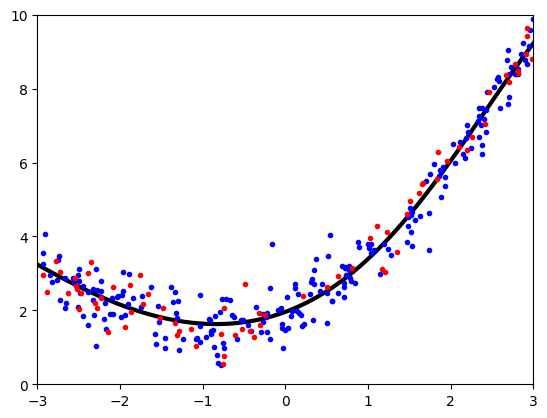

In [3]:
from sklearn.svm import SVR
model = SVR(gamma=0.1, C=10)
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(x_new)

plt.plot(x_new, y_pred,'k-',  linewidth=3)
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("", fontsize=18)
plt.ylabel("", fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

**Support Vector Classifier**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

In [5]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1)
rng = np.random.RandomState(2)
x += 1 * rng.uniform(size=x.shape)
linearly_separable = (x, y)

datasets = [make_moons(noise=0.1),
            make_circles(noise=0.1, factor=0.5),
            linearly_separable ]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

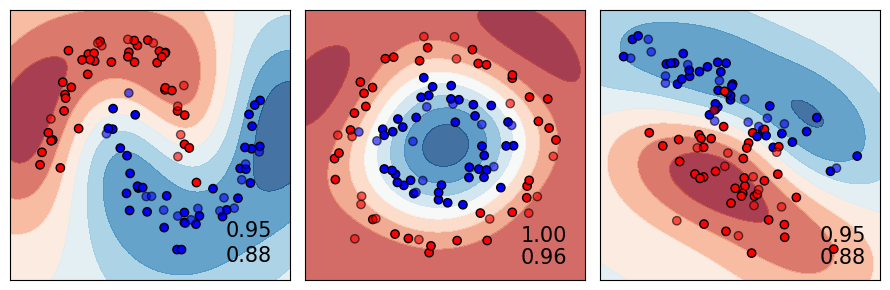

In [6]:
figure = plt.figure(figsize=(9, 3))
h = .02  # step
i = 1 # counter


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

    x, y = ds
    x = StandardScaler().fit_transform(x)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)

    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    model = SVC()
    ax = plt.subplot(1, 3, i)
    model.fit(xtrain, ytrain)
    score_train = model.score(xtrain, ytrain)
    score_test = model.score(xtest, ytest)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(model, "decision_function"):
        zz = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    zz = zz.reshape(xx.shape)
    ax.contourf(xx, yy, zz, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=cm_bright,
                   edgecolors='k')
    # Plot the testing points
    ax.scatter(xtest[:, 0], xtest[:, 1], c=ytest, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    ax.text(xx.max() - .3, yy.min() + .7, '%.2f' % score_train,
            size=15, horizontalalignment='right')

    ax.text(xx.max() - .3, yy.min() + .3, '%.2f' % score_test,
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()